# 1. Importing The Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import pickle


# 2. Reading Dataset and Showing the first 5 rows of data

In [2]:
dataset = pd.read_csv('breast-cancer-wisconsin.data')

dataset.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


dataset.head() shows the first 5 rows but with wrong column titles as column titles are shown in values so we need to set 
the column values with Features

In [3]:
data_columns = [
    'Sample code number',
    'Clump Thickness',
     'Uniformity of Cell Size',
     'Uniformity of Cell Shape',
     'Marginal Adhesion',
     'Single Epithelial Cell Size',
     'Bare Nuclei',
     'Bland Chromatin',
     'Normal Nucleoli',
     'Mitoses',
     'Class']
dataset = pd.read_csv('breast-cancer-wisconsin.data',names=data_columns)

dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# 3. Datatypes of Features

In [4]:
dataset.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

<p style="font-size:18px;">
The 'Bare Nuclei' column is of type Object so this column may have missing Values (?) so we need to find a way to clear these missing values <br>
we need to search for the Non-numeric values in this column</p>

In [5]:
# This function is used to find the non-numeric values in the dataset >> missing values ?
def non_numeric_data(data):
    return not data.isnumeric()
# Return the missing values

 Now we find the non-numeric values in dataset

In [6]:
dataset['Bare Nuclei'].apply(non_numeric_data)
# It will return >> False if the data is numeric , and True if data non-numeric but we need this values to be stored in a mask to be applied to dataset
mask = dataset['Bare Nuclei'].apply(non_numeric_data)
mask

0      False
1      False
2      False
3      False
4      False
       ...  
694    False
695    False
696    False
697    False
698    False
Name: Bare Nuclei, Length: 699, dtype: bool

In [7]:
# Showing THe dataset with non-numeric values
data_non_numeric = dataset[mask]
data_non_numeric.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2


In [8]:
# Showing THe dataset with non-numeric values
data_numeric = dataset[~mask]  # This mark ~ >>> is not 
data_numeric.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [9]:
# if u want to see the difference between the original dataset and the numeric dataset
print(len(dataset))
print(len(data_numeric))

699
683


# Solution 1 : Removing all the Rows that have missing values so the remaining data will be the numeric data
<p style="font-size:18px;"> So we can continue our project by using the Numeric dataset >> (data_numeric) <br>
but in order to do that we just need to convert the datatype of column 'Bare Nuclei' to int64<br> as the data in data_numeric is a copy of the original dataset </p>

In [10]:
data_numeric.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [11]:
data_numeric['Bare Nuclei'] =  data_numeric['Bare Nuclei'].astype('int64')

<ipython-input-11-21820f017ed3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric['Bare Nuclei'] =  data_numeric['Bare Nuclei'].astype('int64')


In [12]:
# The new datatype has been applied
data_numeric.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

# Solution 2 : Replacing all the missing values of with the average value of their column

In [13]:
# First we get the average values of the column 'Bare Nuclei'
bare_nuc_mean = data_numeric['Bare Nuclei'].mean()
bare_nuc_mean

3.5446559297218156

<p style="font-size:20px;"> now we need to replace all the missing values in the original data with this value of mean </p>

In [14]:
data_non_numeric['Bare Nuclei'] = bare_nuc_mean
#data_non_numeric['Bare Nuclei']
# we maybe need to round the mean to make the datatype of this table >> int64
data_non_numeric['Bare Nuclei'] = round(bare_nuc_mean)
data_non_numeric['Bare Nuclei']

<ipython-input-14-49205e0f6f8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_non_numeric['Bare Nuclei'] = bare_nuc_mean
<ipython-input-14-49205e0f6f8a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_non_numeric['Bare Nuclei'] = round(bare_nuc_mean)


23     4
40     4
139    4
145    4
158    4
164    4
235    4
249    4
275    4
292    4
294    4
297    4
315    4
321    4
411    4
617    4
Name: Bare Nuclei, dtype: int64

In [15]:
data_non_numeric.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

# Splitting the data into Input and Output using train_test_split from sklearn

### The project is implemented using Solution 1

In [16]:
# The Data input is all the columns but without The Target (Class >> Output) & The Id >> Sample Code number
data_input = data_numeric.drop(columns=['Sample code number','Class'])
data_output = data_numeric['Class']
data_input.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [17]:
data_output.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

<p style="font-size:18px;"> The <b>Class column</b> has 2 values which are :  2 >> benign , 4 >> malignant <br>

In general Classification problem we see the Target Variable has 2 values (0,1) so we just need to replace the values of 2 to be 0 <br>
and 4 to be 1</p>

In [18]:
# Returning the Unique Values of the columns without their repetition
data_output.unique()

array([2, 4], dtype=int64)

In [19]:
# Replacing the values : we can use replace function and replacing values as dictionaries
data_output = data_output.replace({2 : 0, 4 : 1})
data_output.unique()

array([0, 1], dtype=int64)

## Train Test Split 

In [20]:
X, X_test , y,y_test = train_test_split(data_input,
                                       data_output,
                                        test_size=0.33,
                                       random_state = 2)
# Test size >> is the percentage of Test set size which is 33% of the Whole data
# Random State >> when u set this number to fixed number
# everytime you use train_test_split the function splits the data randomly each time so we need to put the random state with fixed number in order to not randomize data each time
# ----------------------------------------------------

# Split the X, y to training set and validation set
X_train, X_val, y_train, y_val = train_test_split(data_input,
                                       data_output,
                                        test_size=0.33,
                                       random_state = 2)
# Test size >> is the percentage of Test set size which is 33% of the Whole data
# Random State >> when u set this number to fixed number
# everytime you use train_test_split the function splits the data randomly each time so we need to put the random state with fixed number in order to not randomize data each time
# ----------------------------------------------------

# Split the X, y to training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.33, random_state =2)

In [21]:
print("Shape of The Training input : ", X_train.shape)
print("Shape of The Training Output : ",y_train.shape) # Output of Training
print("Shape of The Validation input : ",X_val.shape)
print("Shape of The Validation Output : ",y_val.shape) # Output of Validation
print("Shape of The Test input : ",X_test.shape)
print("Shape of The Test Output : ",y_test.shape) # Output of Test

Shape of The Training input :  (306, 9)
Shape of The Training Output :  (306,)
Shape of The Validation input :  (151, 9)
Shape of The Validation Output :  (151,)
Shape of The Test input :  (226, 9)
Shape of The Test Output :  (226,)


# Implementing Decision Tree Model

#### We can also set a random state to the model in order not to use random data each time we implement the model

In [22]:
# Initialize Model with HyperParameter (Max Dipth)
model = DecisionTreeClassifier(max_depth=3,random_state=2)

In [23]:
# Training The Model
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

### Validation  >>> we calculate Accuracy of Training & Accuracy of Validation
### So first we should give the model input and it predicts the target or output and compare the prediction with the real value


In [24]:
# Predicting The training & validation
y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

### Comparing the Predicted Value and Real Value using the Accuracy score

In [25]:

# Accuracy
print("Accuracy of Training = {} %".format(accuracy_score(y_train,y_pred_train)*100))
print("Accuracy of Validation = {} %".format(accuracy_score(y_val,y_pred_val)*100))

Accuracy of Training = 98.0392156862745 %
Accuracy of Validation = 96.68874172185431 %


## If u want to enhance the accuracy u can change the hyperparameter which is max_depth

# Hint : 
<p style="font-size:18px;">we can make a for loop that loops on the model with different values of max_depth and then we store the values of accuracy in a list <br>
after that we can make a chart that displays each accuracy with its value of max dipth </p>

In [26]:
# List containing max depth values form 1 to 8
max_depth_values = [ i for i in range(1,9)]
#max_depth_values = [1,2,3,4,5,6,7,8]
# List containing the values of accuracy of Training according to the values of max depth (1:8)
train_acc_list = []
# List containing the values of accuracy of Validation according to the values of max depth (1:8)
val_acc_list =[]

for max_depth_val in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth_val,random_state=2)
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train) 
    y_pred_val = model.predict(X_val)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    accuracy_val = accuracy_score(y_val,y_pred_val)
    train_acc_list.append(accuracy_train)
    val_acc_list.append(accuracy_val)

# Drawing the Values of Max depth on X axis and Accuracy of Train and Validation on Y axis

Text(0.5, 1.0, 'Effect of Max depth on Accuracy')

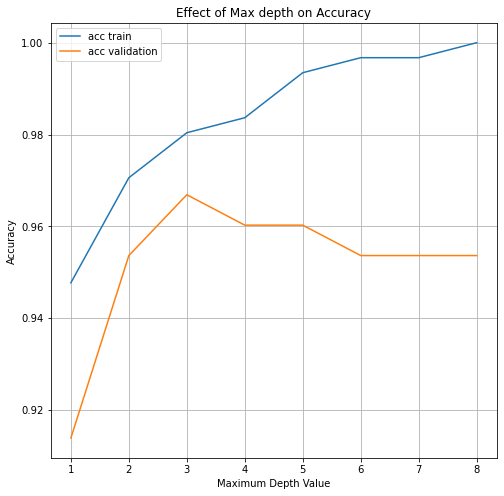

In [27]:
plt.figure(figsize=(8,8))
plt.plot(max_depth_values,train_acc_list,label='acc train')
plt.plot(max_depth_values,val_acc_list,label='acc validation')
plt.legend()
plt.grid(axis='both')
plt.xlabel('Maximum Depth Value')
plt.ylabel('Accuracy')
plt.title('Effect of Max depth on Accuracy')


# Notes
- <p style="font-size:18px;"> In the above plot we can see that the best value of max depth is three as the value of accuracy at train and validation increases at this value </p> <br>
- <p style="font-size:18px;"> Max depth values 4 to 8, the accuracy of training is increasing and high </p><br>
- <p style="font-size:18px;"> Max depth values 4 to 8, the accuracy of validation is increasing and high  </p><br>
- <p style="font-size:18px;"> This is called Overfitting (High Training Accuracy and Low Validation Accuracy)  </p><br>

# Now we Test the model with new data  (Test Dataset)

In [28]:
model_best = DecisionTreeClassifier(max_depth=3,random_state=2)
model_best.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [29]:
# Predicting the test set
y_pred_test = model_best.predict(X_test)
print("The Accuracy of Test set = {} %".format(accuracy_score(y_test,y_pred_test)*100))

The Accuracy of Test set = 92.92035398230088 %


# Saving the model

In [30]:
# Create new file with extension of .pickle and we use wb >> write binary
with open('best_model.pickle','wb') as f:
    pickle.dump(model_best,f)


# Loading the model

In [31]:
# Read the file using rb >> read binary
with open('best_model.pickle','rb') as f:
    loaded_model = pickle.load(f)

# Drawing Tree

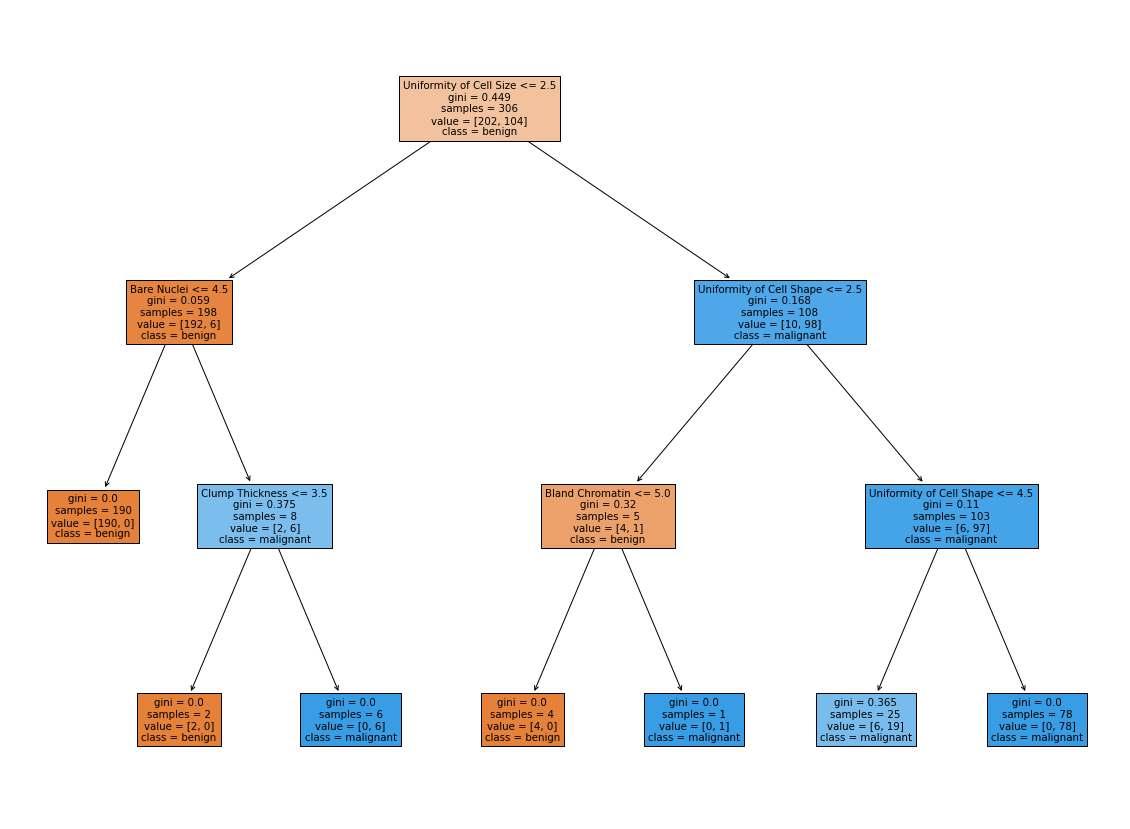

In [32]:
features_names=['Clump Thickness',
                    'Uniformity of Cell Size',
                     'Uniformity of Cell Shape',
                     'Marginal Adhesion',
                     'Single Epithelial Cell Size',
                     'Bare Nuclei',
                     'Bland Chromatin',
                     'Normal Nucleoli',
                     'Mitoses']
plt.figure(figsize=(20,15))
tree.plot_tree(loaded_model,
    feature_names=features_names,
              class_names=['benign','malignant'],
              filled=True) # Filled makes the Tree colored

plt.show()

# The importance of Features 

In [33]:
model_best.feature_importances_

array([0.02340327, 0.83879425, 0.05794766, 0.        , 0.        ,
       0.06737306, 0.01248175, 0.        , 0.        ])

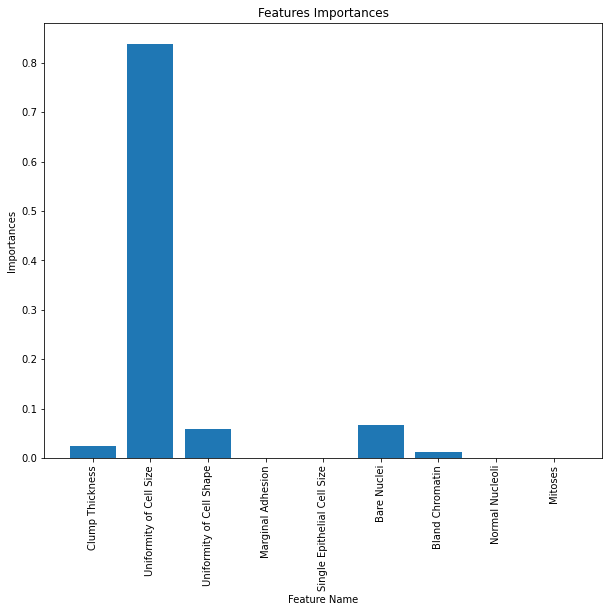

In [34]:
# Plotting the importances
plt.figure(figsize=(10,8))
plt.bar(features_names,model_best.feature_importances_)
plt.xticks(rotation=90) # To rotate the names of Features
plt.xlabel("Feature Name")
plt.ylabel("Importances")
plt.title("Features Importances")
plt.show()

# Feature Selection 

# we can drop these columns as they are not important 
- <p style="font-size:18px"> Marginal Adhesion</p> <br>
- <p style="font-size:18px"> Single Epithelial Cell Size</p><br>
- <p style="font-size:18px"> Bland Chromatin</p> <br>
- <p style="font-size:18px"> Normal Nucleoli</p> <br>
- <p style="font-size:18px"> Mitoses</p><br>


## The new Input data after implementing Feature Selection

In [35]:
new_data_input = data_numeric.drop(columns=['Sample code number','Class','Marginal Adhesion','Single Epithelial Cell Size','Bland Chromatin','Normal Nucleoli',"Mitoses"])
data_input.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


## Splitting the Data 

In [36]:
X, X_test , y,y_test = train_test_split(new_data_input,
                                       data_output,
                                        test_size=0.33,
                                       random_state = 2)

# Split the X, y to training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.33, random_state =2)


In [37]:
print("Shape of The Training input : ", X_train.shape)
print("Shape of The Training Output : ",y_train.shape) # Output of Training
print("Shape of The Validation input : ",X_val.shape)
print("Shape of The Validation Output : ",y_val.shape) # Output of Validation
print("Shape of The Test input : ",X_test.shape)
print("Shape of The Test Output : ",y_test.shape) # Output of Test

Shape of The Training input :  (306, 4)
Shape of The Training Output :  (306,)
Shape of The Validation input :  (151, 4)
Shape of The Validation Output :  (151,)
Shape of The Test input :  (226, 4)
Shape of The Test Output :  (226,)


## Training Model on different Max depthes

In [38]:
# List containing max depth values form 1 to 8
max_depth_values = [ i for i in range(1,9)]
#max_depth_values = [1,2,3,4,5,6,7,8]
# List containing the values of accuracy of Training according to the values of max depth (1:8)
new_train_acc_list = []
# List containing the values of accuracy of Validation according to the values of max depth (1:8)
new_val_acc_list =[]

for max_depth_val in max_depth_values:
    new_model = DecisionTreeClassifier(max_depth=max_depth_val,random_state=2)
    new_model.fit(X_train,y_train)
    y_pred_train = new_model.predict(X_train) 
    y_pred_val = new_model.predict(X_val)
    new_accuracy_train = accuracy_score(y_train,y_pred_train)
    new_accuracy_val = accuracy_score(y_val,y_pred_val)
    new_train_acc_list.append(new_accuracy_train)
    new_val_acc_list.append(new_accuracy_val)

Text(0.5, 1.0, 'Effect of Max depth on Accuracy')

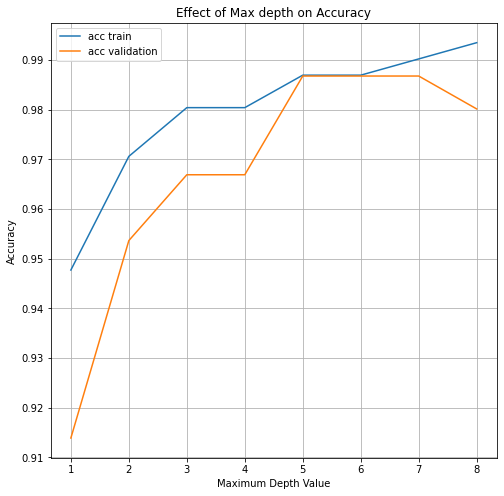

In [39]:
plt.figure(figsize=(8,8))
plt.plot(max_depth_values,new_train_acc_list,label='acc train')
plt.plot(max_depth_values,new_val_acc_list,label='acc validation')
plt.legend()
plt.grid(axis='both')
plt.xlabel('Maximum Depth Value')
plt.ylabel('Accuracy')
plt.title('Effect of Max depth on Accuracy')


# So the best max_depth_value = 4 & 5

In [40]:
new_best_model = DecisionTreeClassifier(max_depth=4,random_state=2)
new_best_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=2)

In [41]:
new_y_pred_test = new_best_model.predict(X_test)
print("The Accuracy of Test = {} %".format(accuracy_score(y_test,new_y_pred_test)*100))

The Accuracy of Test = 92.47787610619469 %


In [42]:
# Create new file with extension of .pickle and we use wb >> write binary
with open('model_after_feature_selection.pickle','wb') as f:
    pickle.dump(new_best_model,f)
